In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [11]:
#from sklearn import linear_model
from sklearn.linear_model import Lasso
#from sklearn.cross_validation import train_test_split

In [12]:
data = pd.read_csv('train_cleaned.csv')

In [13]:
x = data.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [14]:
y = data.loc[:,'SalePrice_log':'SalePrice_log']

In [96]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2, random_state=0)

In [97]:
x.shape

(1456, 202)

In [6]:
reg = Lasso(alpha=0.005)

In [99]:
reg.fit(train_x,train_y)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
reg.score(train_x, train_y)

0.8810494576066235

In [101]:
reg.score(test_x, test_y)

0.8718768374279996

In [102]:
reg.coef_.count_nonzero

array([-0.00477092,  0.        ,  0.        , -0.        ,  0.        ,
       -0.00306132,  0.01510849, -0.00107809, -0.        , -0.        ,
        0.        , -0.        , -0.09739617,  0.        ,  0.        ,
        0.        , -0.0794598 ,  0.        , -0.        ,  0.06990526,
        0.        ,  0.04493329,  0.1102187 ,  0.        , -0.        ,
        0.        ,  0.50231777,  0.        , -0.03014167, -0.        ,
       -0.        ,  0.08396912,  0.        , -0.        , -0.00382862,
       -0.        ,  0.00545409, -0.00467395,  0.        ,  0.00488978,
        0.12083213,  0.02522363,  0.        ,  0.        , -0.        ,
        0.00635525,  0.        ,  0.02519914,  0.00593281,  0.08750068,
        0.0271218 , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.00113288, -0.        ,  0.00373892,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [87]:
reg.predict(test_x).reshape((292,1))

array([[11.85503357],
       [12.35430982],
       [11.41863222],
       [11.87562242],
       [12.60665977],
       [11.8088896 ],
       [12.23731471],
       [12.53517017],
       [11.28989017],
       [11.77601196],
       [12.66458915],
       [12.35879966],
       [12.30500987],
       [12.39594965],
       [12.19912735],
       [12.21263715],
       [11.98308484],
       [11.6975897 ],
       [11.64884304],
       [12.18023229],
       [12.10552619],
       [11.8240189 ],
       [11.54272859],
       [11.8197703 ],
       [12.69887118],
       [11.57719403],
       [12.008864  ],
       [11.81958824],
       [12.60232711],
       [12.37986566],
       [11.99585589],
       [12.0551345 ],
       [12.31050711],
       [11.85614296],
       [12.18682179],
       [11.59642784],
       [11.77183936],
       [11.61527842],
       [12.28215568],
       [11.83013804],
       [11.82866563],
       [11.82961588],
       [11.49153448],
       [12.15701041],
       [12.26345813],
       [12

In [88]:
np.mean((reg.predict(test_x).reshape((292,1)) - test_y)**2)

SalePrice_log    0.014652
dtype: float64

# Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

In [8]:
rmse_cv(reg).mean()

0.14289248196846946

In [ ]:
0.14289248196

# See Coefficients

In [21]:
reg = Lasso(alpha=0.003)

In [22]:
reg.fit(x,y)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
coef = pd.Series(reg.coef_.reshape(-1), index = x.columns)

In [24]:
imp_coef = pd.concat([coef.sort_values()[-1:-11:-1],coef.sort_values()[10::-1]])

In [25]:
imp_coef

GrLivArea_log           0.521438
OverallCond_log         0.172005
GarageCars_log          0.121944
LotArea_log             0.088150
YearBuilt_log           0.082987
Fireplaces_log          0.064311
Functional_log          0.061539
SaleType_New            0.050926
OverallQual_log         0.046075
Foundation_PConc        0.044352
Neighborhood_Edwards   -0.003812
MiscVal_log            -0.005946
BsmtExposure_log       -0.006076
GarageFinish_log       -0.006489
LowQualFinSF_log       -0.006544
2ndFlrSF_log           -0.006989
FireplaceQu_log        -0.015811
HeatingQC_log          -0.027541
KitchenQual_TA         -0.038382
BsmtQual_log           -0.092828
ExterQual_log          -0.106448
dtype: float64

Text(0.5,1,'Main Coefficients in the Lasso Model')

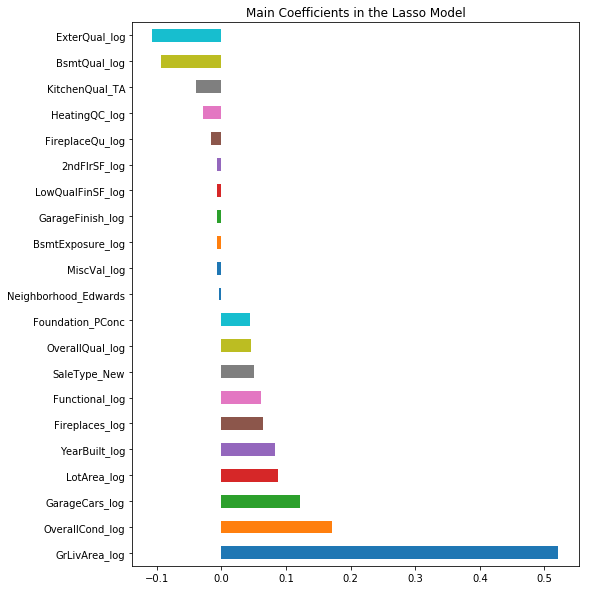

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Main Coefficients in the Lasso Model")

# Save Single Model Predicted Result for Kaggle Submission

In [87]:
data_sub = pd.read_csv('test_cleaned.csv')

In [88]:
data_sub_x = data_sub.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [89]:
reg.predict(data_sub_x).reshape((1459,1))

array([[11.69791904],
       [11.97517251],
       [12.224089  ],
       ...,
       [12.09038836],
       [11.68894475],
       [12.3629835 ]])

In [90]:
log_y_sub = reg.predict(data_sub_x).reshape((1459,1))

In [91]:
log_y_sub.shape

(1459, 1)

In [92]:
sub = np.exp(log_y_sub)

In [114]:
sub

array([[120321.07109447],
       [158763.7468864 ],
       [203635.92589989],
       ...,
       [178151.2809265 ],
       [119246.10584916],
       [233978.26363769]])

In [93]:
sub1 = pd.DataFrame(sub,columns = ['SalePrice'])

In [94]:
sub2 = pd.DataFrame(np.arange(1461,2920),columns = ['Id'])

In [95]:
sub2['SalePrice'] = sub1['SalePrice']

In [96]:
sub2.to_csv('sub_lasso.csv',index = False)